In [31]:
#dependencies
import pandas as pd
import os
import csv

In [32]:
player_data = './resources/player_data.csv'
player_data = pd.read_csv(player_data)
player_data
player_data['name']

player_data = player_data.rename(columns={'name': 'Player'})
player_data

players = './resources/Players.csv'
players = pd.read_csv(players)
players
players['Player']

Player_Profile_dirty = pd.merge(player_data, players,
                                 how='left', on=["Player","Player"])



In [33]:
#?? sorting by first name 
Player_Profile_dirty.sort_values("Player", inplace = True) 
  
#?? dropping ALL duplicte values 
Player_Profile_dirty.drop_duplicates(subset ="Player", 
                     keep = False, inplace = True) 
  
##### Player_Profile_dirty

Player_Profile = Player_Profile_dirty.dropna(axis = 0, how ='any') 
  
# comparing sizes of data frames 
print("Old data frame length:", len(Player_Profile_dirty), "\nNew data frame length:",  
       len(Player_Profile), "\nNumber of rows with at least 1 NA value: ", 
       (len(Player_Profile_dirty)-len(Player_Profile)))

Old data frame length: 4453 
New data frame length: 3019 
Number of rows with at least 1 NA value:  1434


In [34]:
print("We have made a <<Player_Profile>> for all ***NBA PLayers***") 
print('--------------'*5)
print("In the 'Player_Plrofile' dataframe you find:")
print(" Players Names, Career Position, Physical Attributes, Birth Info, & Geological BackGround")
# print("????????")   
# print("lets compare the their IDs to thier Statics sine 1982 to determine if thier are any correlations between the two, primarly in regard to physical attributes.")
Player_Profile
#provide player databack ground data(non controlables), but does not provide performance data(STATS))

We have made a <<Player_Profile>> for all ***NBA PLayers***
----------------------------------------------------------------------
In the 'Player_Plrofile' dataframe you find:
 Players Names, Career Position, Physical Attributes, Birth Info, & Geological BackGround


,Player,year_start,year_end,position,height_x,weight_x,birth_date,college,Unnamed: 0,height_y,weight_y,collage,born,birth_city,birth_state
474,Aaron Brooks,2008,2018,G,6-0,161.0,"January 14, 1985",University of Oregon,3211.0,183.0,73.0,University of Oregon,1985.0,Seattle,Washington
1451,Aaron Gordon,2015,2018,F,6-9,220.0,"September 16, 1995",University of Arizona,3707.0,206.0,99.0,University of Arizona,1995.0,San Jose,California
1489,Aaron Gray,2008,2014,C,7-0,270.0,"December 7, 1984",University of Pittsburgh,3225.0,213.0,122.0,University of Pittsburgh,1984.0,Tarzana,California
1666,Aaron Harrison,2016,2017,G,6-6,210.0,"October 28, 1994",University of Kentucky,3780.0,198.0,95.0,University of Kentucky,1994.0,San Antonio,Texas
1945,Aaron James,1975,1979,F,6-8,210.0,"October 5, 1952",Grambling State University,1040.0,203.0,95.0,Grambling State University,1952.0,New Orleans,Louisiana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,Zach LaVine,2015,2017,G,6-5,189.0,"March 10, 1995","University of California, Los Angeles",3724.0,196.0,85.0,"University of California, Los Angeles",1995.0,Renton,Washington
3312,Zach Randolph,2002,2018,F-C,6-9,260.0,"July 16, 1981",Michigan State University,2825.0,206.0,117.0,Michigan State University,1981.0,Marion,Indiana
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,746.0,206.0,106.0,Iowa State University,1946.0,Brooklyn,New York
4531,Zeke Zawoluk,1953,1955,F-C,6-7,215.0,"October 13, 1930",St. John's University,318.0,201.0,97.0,St. John's University,1930.0,Brooklyn,New York


In [35]:

print("We import ***The Seasons Stats***,")
print("")
print("We see the stats for ever *** NBA Player, on Team, for each Year ***.")
print("   ex. if a player was traded 3 times in one Season it will show 3 rows of *Performance Stats for that Year for that Player")
print("")
print("Additionly, A player's *Position/'role' will alter their perfomance behavior")
print("and thus increase/decrease opportunity to contribute to Performance statics uniformly,")
print("However each Position has a uniform for desired statistical traits that can be identified")
print("amongst a range of Players(Top15, Top100, All NBA PLayers,) who hold that postion")
print(" ")
print(" ")
print(" 'Year Position'   Player positions may change amongst the years but not their Career Position from their Player_Profile")

stats_data = './resources/Seasons_Stats.csv'
stats_data = pd.read_csv(stats_data)
stats_data['Pos'].value_counts()

We import ***The Seasons Stats***,

We see the stats for ever *** NBA Player, on Team, for each Year ***.
   ex. if a player was traded 3 times in one Season it will show 3 rows of *Performance Stats for that Year for that Player

Additionly, A player's *Position/'role' will alter their perfomance behavior
and thus increase/decrease opportunity to contribute to Performance statics uniformly,
However each Position has a uniform for desired statistical traits that can be identified
amongst a range of Players(Top15, Top100, All NBA PLayers,) who hold that postion
 
 
 'Year Position'   Player positions may change amongst the years but not their Career Position from their Player_Profile


PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
SG-PG      27
PF-C       27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
SF-PG       1
PG-SF       1
Name: Pos, dtype: int64

In [36]:
print("Career Positions from Payer_Profile")
Player_Profile['position'].value_counts()

Career Positions from Payer_Profile


G      1083
F       854
C       306
F-C     267
G-F     227
C-F     147
F-G     135
Name: position, dtype: int64

In [37]:
NBA_All_Stats_and_Profile_df = pd.merge(Player_Profile, stats_data,
                                 how='left', on=["Player","Player"])
# list(NBA_All_Stats_and_Profile_df)

In [82]:
# #list all columns and create new columns I want (height and weight)

new_columns = [
    'Year',
    'Player',
    'Pos',
    'position',
    'Age',
    'height_x','height_y',
    'weight_x','weight_y',
    'DRB','STL','BLK',
    'TRB',
    'ORB',
    'AST',
    'PTS',
    'FG','FGA','FG%','eFG%',
    '3P','3PA','3P%',
    '2P','2PA','2P%',
    'FT','FTA','FT%',
    'TOV',
    'PF',
    'G',
    'GS',
    'MP',
    'Tm',
    'born','birth_date','birth_city','birth_state',
    'collage','college',
    'PER']
NBA_Unedited_Coloumns_df = NBA_All_Stats_and_Profile_df[new_columns]


NBA_df = NBA_Unedited_Coloumns_df.rename(columns={'Pos':"Year Position",
                                   "position":'Career Position',
                                   "MP":"Minutes Per Seasom",
                                   "Tm":"Team",
                                   "G":"Games Played",
                                   "GS":"Games Started",
                                   "PF":"Personal Fouls",
                                   "birth_state":"Birth City",
                                   "birth_city":"Birth State",
                                   "birth_date":"DOB",
                                   "born":"YearBorn",
                                   "height_x":"Ht:ins",
                                   "height_y":"Ht:cm",
                                   "weight_x":"Wt:lbs",
                                   "weight_y":"Wt:kgs",
                                   "PER":"Player Rating",
                                  })
NBA_df

,Year,Player,Year Position,Career Position,Age,Ht:ins,Ht:cm,Wt:lbs,Wt:kgs,DRB,...,Games Started,Minutes Per Seasom,Team,YearBorn,DOB,Birth State,Birth City,collage,college,Player Rating
0,2008.0,Aaron Brooks,PG,G,23.0,6-0,183.0,161.0,73.0,43.0,...,0.0,608.0,HOU,1985.0,"January 14, 1985",Seattle,Washington,University of Oregon,University of Oregon,13.1
1,2009.0,Aaron Brooks,PG,G,24.0,6-0,183.0,161.0,73.0,124.0,...,35.0,1998.0,HOU,1985.0,"January 14, 1985",Seattle,Washington,University of Oregon,University of Oregon,12.9
2,2010.0,Aaron Brooks,PG,G,25.0,6-0,183.0,161.0,73.0,161.0,...,82.0,2919.0,HOU,1985.0,"January 14, 1985",Seattle,Washington,University of Oregon,University of Oregon,16.0
3,2011.0,Aaron Brooks,PG,G,26.0,6-0,183.0,161.0,73.0,58.0,...,12.0,1284.0,TOT,1985.0,"January 14, 1985",Seattle,Washington,University of Oregon,University of Oregon,13.1
4,2011.0,Aaron Brooks,PG,G,26.0,6-0,183.0,161.0,73.0,40.0,...,7.0,811.0,HOU,1985.0,"January 14, 1985",Seattle,Washington,University of Oregon,University of Oregon,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19316,2004.0,Zendon Hamilton,C,C-F,28.0,6-11,211.0,250.0,113.0,97.0,...,0.0,473.0,PHI,1975.0,"April 27, 1975",Floral Park,New York,St. John's University,St. John's University,15.9
19317,2005.0,Zendon Hamilton,C,C-F,29.0,6-11,211.0,250.0,113.0,24.0,...,0.0,159.0,MIL,1975.0,"April 27, 1975",Floral Park,New York,St. John's University,St. John's University,10.4
19318,2006.0,Zendon Hamilton,C,C-F,30.0,6-11,211.0,250.0,113.0,8.0,...,0.0,49.0,TOT,1975.0,"April 27, 1975",Floral Park,New York,St. John's University,St. John's University,17.6
19319,2006.0,Zendon Hamilton,C,C-F,30.0,6-11,211.0,250.0,113.0,8.0,...,0.0,46.0,CLE,1975.0,"April 27, 1975",Floral Park,New York,St. John's University,St. John's University,18.2


In [83]:
NBA_df.to_csv('./NBA_dfs/All_NBA_PLayers_PPS.csv') #THIS WILL BE THE DATA FRAME WE BUILD OUR 4 POSITIONS FROM

In [84]:
#  1ST  NBA Guards by Career Position

G_NBA_df = NBA_df.loc[(NBA_df['Career Position']== "G")|(NBA_df['Career Position']== "G-F")|(NBA_df['Career Position']== "F-G")] 
G_NBA_df.to_csv('./NBA_dfs/All_Guards_PPS.csv')
G_NBA_df['Career Position'].value_counts()
# G_NBA_df['Career Position'].count()

G      6567
G-F    1694
F-G    1045
Name: Career Position, dtype: int64

In [85]:
G_NBA_df['Year Position'].value_counts() # A 'Career Gaurd' may, but is not likely to play  a 'Year' as a 'Foward',

PG       3848
SG       3774
SF       1391
G          70
PF         53
G-F        38
F-G        38
PG-SG      26
SF-SG      22
SG-PG      22
SG-SF      18
SG-PF       2
PF-SF       2
PG-SF       1
SF-PF       1
Name: Year Position, dtype: int64

In [86]:
#  2ND  NBA Forwards by Career Position (these then to be your more all around Players aka your "BIGGIE SMALLS" his role is difine by his talents that are sought o be applied, thats why they rotate bewteen Guards and Centers.Thier role is more defined under "Year Position ex SF, PF,and F")

F_NBA_df = NBA_df.loc[(NBA_df['Career Position']== "F")|(NBA_df['Career Position']== "G-F")|(NBA_df['Career Position']== "F-G")|(NBA_df['Career Position']== "F-C")|(NBA_df['Career Position']== "C-F")] 
F_NBA_df.to_csv('./NBA_dfs/All_Fowards_PPS.csv')
F_NBA_df['Career Position'].value_counts()
# F_NBA_df['Career Position'].count()

F      4624
F-C    2283
G-F    1694
C-F    1220
F-G    1045
Name: Career Position, dtype: int64

In [87]:
F_NBA_df['Year Position'].value_counts()

PF       3941
SF       3461
C        1696
SG       1373
PG         83
F          58
F-C        41
F-G        38
G-F        38
C-PF       25
C-F        21
PF-C       20
SF-SG      19
SF-PF      16
PF-SF      16
SG-SF      14
SG-PF       2
C-SF        1
PG-SG       1
SG-PG       1
PG-SF       1
Name: Year Position, dtype: int64

In [88]:
#  3RD  NBA Centers by Career Position

C_NBA_df = NBA_df.loc[(NBA_df['Career Position']== "C")|(NBA_df['Career Position']== "C-F")|(NBA_df['Career Position']== "F-C")] 
C_NBA_df.to_csv('./NBA_dfs/All_Centers_PPS.csv')
C_NBA_df['Career Position'].value_counts()
# C_NBA_df['Career Position'].count()

F-C    2283
C      1888
C-F    1220
Name: Career Position, dtype: int64

In [89]:
C_NBA_df['Year Position'].value_counts()

C        3303
PF       1797
SF        189
F-C        41
C-F        21
PF-C       19
C-PF       16
SG          3
PF-SF       1
C-SF        1
Name: Year Position, dtype: int64

In [90]:
NBA_82_17_df = NBA_df.loc[(NBA_df['Year']>=1982)] 
NBA_82_17_df.to_csv('./NBA_dfs/All_NBA_82_17_PPS.csv')
# NBA_82_17_df.sort_values(by=['Year'])

In [91]:
G_82_17_df = G_NBA_df.loc[(G_NBA_df['Year']>=1982)]
G_82_17_df.to_csv('./NBA_dfs/All_Guards_82_17_PPS.csv')
# G_82_17_df.sort_values(by=['Year'])

In [92]:
F_82_17_df = F_NBA_df.loc[(F_NBA_df['Year']>=1982)] 
F_82_17_df.to_csv('./NBA_dfs/All_Forwards_82_17_PPS.csv')
# F_82_17_df.sort_values(by=['Year'])

In [93]:
C_82_17_df = C_NBA_df.loc[(C_NBA_df['Year']>=1982)] 
C_82_17_df.to_csv('./NBA_dfs/All_Centers_82_17_PPS.csv')
# C_82_17_df.sort_values(by=['Year'])

In [102]:
Gaurds = G_82_17_df.groupby(['Player']).mean()
Gaurds

,Year,Age,Ht:cm,Wt:lbs,Wt:kgs,DRB,STL,BLK,TRB,ORB,...,FT,FTA,FT%,TOV,Personal Fouls,Games Played,Games Started,Minutes Per Seasom,YearBorn,Player Rating
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Brooks,2012.600000,27.600000,183.0,161.0,73.0,69.133333,31.266667,7.533333,90.666667,21.533333,...,77.066667,91.400000,0.838000,84.800000,102.933333,53.133333,15.066667,1139.200000,1985.0,12.326667
Aaron Harrison,2016.500000,21.500000,198.0,210.0,95.0,7.000000,3.000000,0.000000,9.000000,2.000000,...,3.000000,7.000000,0.458500,2.000000,6.000000,13.000000,0.000000,55.000000,1994.0,1.050000
Aaron McKie,2000.176471,27.176471,196.0,209.0,94.0,144.647059,64.117647,11.705882,178.764706,34.117647,...,63.941176,81.705882,0.755750,72.058824,110.705882,56.294118,19.411765,1329.058824,1972.0,11.447059
Aaron Miles,2006.000000,22.000000,185.0,175.0,79.0,14.000000,4.000000,1.000000,14.000000,0.000000,...,4.000000,4.000000,1.000000,11.000000,13.000000,19.000000,0.000000,118.000000,1983.0,6.000000
Acie Law,2010.000000,25.000000,190.0,195.0,88.0,25.222222,14.000000,0.555556,30.555556,5.333333,...,28.555556,37.111111,0.764000,22.777778,30.000000,29.444444,1.000000,371.666667,1985.0,11.122222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yakhouba Diawara,2008.500000,25.500000,201.0,225.0,102.0,45.250000,13.000000,4.000000,64.500000,19.250000,...,16.750000,25.750000,0.632000,18.000000,69.000000,46.750000,14.000000,653.500000,1982.0,4.025000
Yogi Ferrell,2017.000000,23.000000,183.0,180.0,81.0,60.666667,28.000000,6.000000,74.000000,13.333333,...,49.333333,59.333333,0.777667,46.666667,60.000000,30.666667,19.333333,798.000000,1993.0,11.233333
Yuta Tabuse,2005.000000,24.000000,175.0,165.0,74.0,2.000000,0.000000,0.000000,4.000000,2.000000,...,4.000000,4.000000,1.000000,1.000000,1.000000,4.000000,0.000000,17.000000,1980.0,15.600000


In [49]:
import matplotlib.pyplot as plt

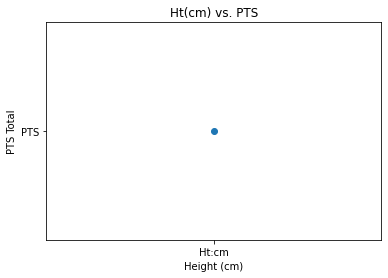

In [101]:
plt.scatter('Ht:cm','PTS')
plt.title("Ht(cm) vs. PTS")
plt.xlabel('Height (cm)')
plt.ylabel('PTS Total')
plt.show()